In [112]:
import pandas as pd
import numpy as np

In [113]:
airpas = pd.read_csv(r'C:\Users\RahulK\Downloads\Machine Learning By Pranjal Sir\Supervised\Time Series\AirPassengers.csv')

In [114]:
airpas.shape

(144, 2)

In [115]:
airpas.head(20)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [116]:
# Lets convert our Month column into datetime format

In [117]:
airpas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [118]:
airpas.Month = pd.to_datetime(airpas.Month)
# airpas.Month = pd.to_datetime(airpas.Month, infer_datetime_format= True) another way

In [119]:
airpas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [120]:
airpas.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [121]:
airpas1 = airpas.set_index(['Month'])

In [122]:
airpas1.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [123]:
airpas1.shape

(144, 1)

In [124]:
import matplotlib.pyplot as plt

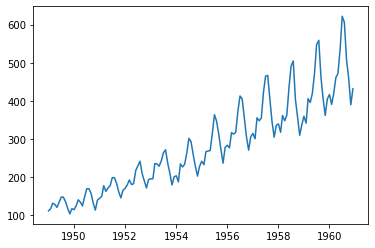

In [125]:
plt.plot(airpas1.Passengers)

# Data is uptrending
# Data is not stationary because mean and variance are changing
# Data is seasonal as within every year, it is increasing and decreasing

In [126]:
# Lets make the data stationary by differencing

lvl1 = airpas1.Passengers.diff()

In [127]:
airpas1.Passengers

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

In [128]:
lvl1

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: Passengers, Length: 144, dtype: float64

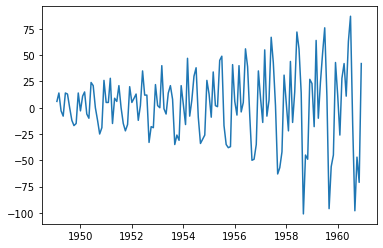

In [129]:
# Lets check if data is stationary after level1 differencing
plt.plot(lvl1)

In [130]:
lvl2 = airpas1.Passengers.diff().diff()

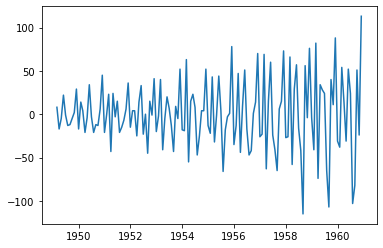

In [131]:
# Lets check if data is stationary after level2 differencing
# plt.plot(lvl2)

plt.plot(airpas1.diff().diff())

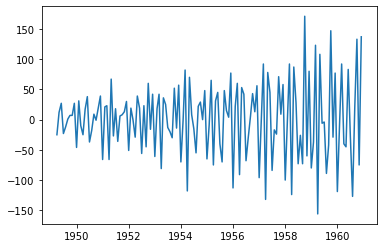

In [132]:
# Lets check if data is stationary after level3 differencing

plt.plot(airpas1.diff().diff().diff())

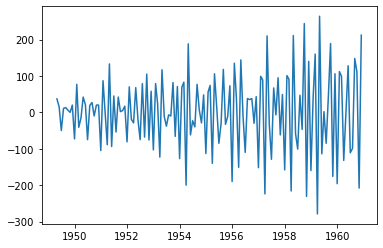

In [133]:
# Lets check if data is stationary after level4 differencing

plt.plot(airpas1.diff().diff().diff().diff())

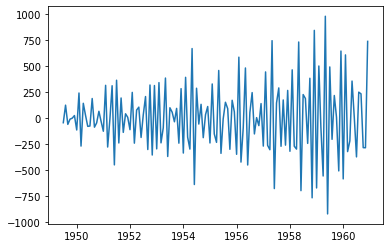

In [134]:
# Lets check if data is stationary after level6 differencing

plt.plot(airpas1.diff().diff().diff().diff().diff().diff())

In [135]:
# We have seen that we are not able to make data stationary even after 6 level of differencing
# Normally data gets stationary within 2 or 3 level of differencing 
# If data doesnt get stationary even after 3 level of differencing, then it is not going to be stationary
# And so we take log
# log will give us a smoothening effect

In [136]:
airpas1_log = np.log(airpas1.Passengers)

In [137]:
airpas1_log

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Passengers, Length: 144, dtype: float64

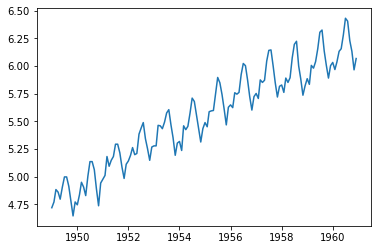

In [138]:
plt.plot(airpas1_log)

# Still not stationary but variance is same

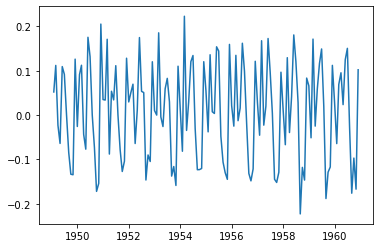

In [139]:
plt.plot(airpas1_log.diff())

# We have received stationary , although not 100% but still we got a stationary model


In [140]:
# Therefore, value of I(differencing) is 1

In [141]:
# Now my model is not going to be built on original series but log of series
# So prediction will be on log and to get answer in original format, we will have to take anti-log

In [142]:
# Lets find the value of p and q from ACF and PACF plot
# We already got the value of d = 1

In [143]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [144]:
# plot_acf(airpas1.Passengers);
# we have to take log data

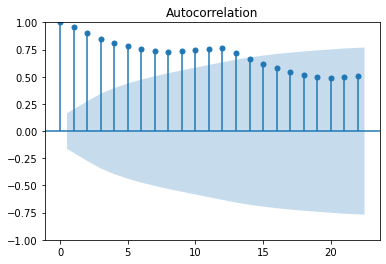

In [145]:
plot_acf(airpas1_log);

In [146]:
# plot_pacf(airpas1.Passengers);
# We have to take log data

C:\Users\RahulK\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


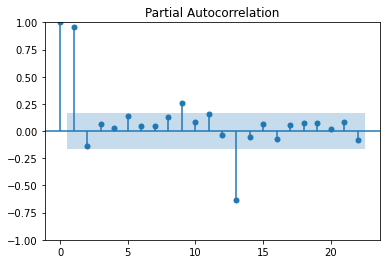

In [147]:
plot_pacf(airpas1_log);

In [148]:
# From the ACF and PACF plot value of p = 2 and q = 0 
# And from differencing d = 1


# ARIMA(not used)

In [149]:
from statsmodels.tsa.arima_model import ARIMA

In [150]:
model210 = ARIMA(airpas1_log, order = (2,1,0)) 

# We are getting error because ARIMA is outdated and not all the version of python will run this code
# We have to directly use SARIMA
# We can change the value of p and q for better performance of the model for forecasting

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [151]:
# result = model210.fit()
# result.params

In [152]:
# result.forecast(steps = 12)
# we are forecasting for next 12 time intervals, and here it is month

In [153]:
# result.forecast(steps = 12)[0] - will give us forecast arrays in log data
# We will convert into antilog


In [154]:
#np.exp(result.forecast(steps = 12)[0])
# But we will see that ARIMA will not give the good result as this is seasonal data

# SARIMA

In [155]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [156]:
# seasonal_decompose is used to find if data is seasonal and time period of seasonality

In [157]:
decompose_result = seasonal_decompose(airpas1)

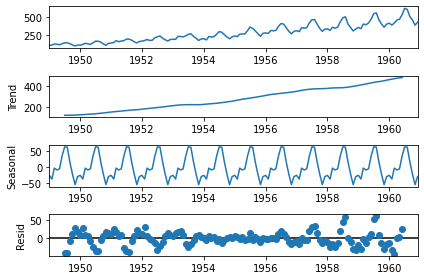

In [158]:
decompose_result.plot();

# This plot is just to know if data is seasonal or not
# If you already know that the data s seasonal, then skip this process

In [159]:
# We need to find time period of seasonality in order to build SARIMA model
# here time period is 12 months

In [160]:
# pip install pmdarima

import pmdarima
from pmdarima import auto_arima

# value which i get from auto_arima is passed to SARIMA

In [161]:
auto_arima(airpas1_log, seasonal= True, m= 12)

# will take sometime

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [162]:
model_sarima = SARIMAX(airpas1_log, order=(2, 0, 0), seasonal_order=(0, 1, 1, 12) )

C:\Users\RahulK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [163]:
sarima_result = model_sarima.fit()

In [164]:
sarima_result.predict()

# Prediction done in log

1949-01-01    0.000000e+00
1949-02-01    7.801270e-08
1949-03-01    1.553525e-07
1949-04-01    2.318964e-07
1949-05-01    3.057374e-07
                  ...     
1960-08-01    6.436391e+00
1960-09-01    6.238473e+00
1960-10-01    6.097054e+00
1960-11-01    5.991834e+00
1960-12-01    6.083839e+00
Freq: MS, Name: predicted_mean, Length: 144, dtype: float64

In [165]:
pred_result = sarima_result.predict(start = 144 , end = 155)
pred_result2 = sarima_result.predict(start = 156 , end = 167)

# Forecasting for next 12 months

In [166]:
pred_result1 = np.exp(pred_result)
pred_result3 = np.exp(pred_result2)


In [167]:
pred_result1

1961-01-01    447.555614
1961-02-01    422.311424
1961-03-01    474.567170
1961-04-01    487.275323
1961-05-01    503.128550
1961-06-01    575.803195
1961-07-01    660.559625
1961-08-01    656.832739
1961-09-01    548.909847
1961-10-01    488.364433
1961-11-01    421.692882
1961-12-01    467.585133
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Month'>

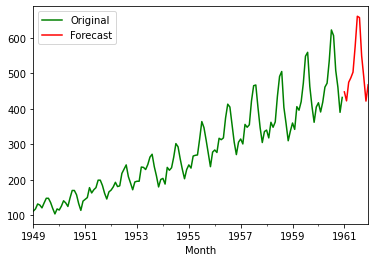

In [168]:
# Lets plot the value 

airpas1['Passengers'].plot(legend = True, label = 'Original', color = 'green')
pred_result1.plot(legend = True, label = 'Forecast', color = 'red')

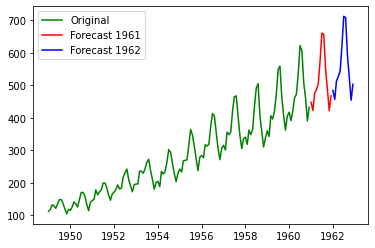

In [169]:
# or 
plt.plot(airpas1, label = 'Original', color = 'green')
plt.plot(pred_result1, label = 'Forecast 1961', color = 'red')
plt.plot(pred_result3, label = 'Forecast 1962', color = 'blue')
plt.legend()

In [170]:
# We should avoid forecasting for a longer period

# Lets build model using Sequential Sampling(Train & Test)

In [171]:
train  = airpas1_log[0:132]
test = airpas1_log[132::]

# These values should be taken as actual values

In [172]:
train

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1959-08-01    6.326149
1959-09-01    6.137727
1959-10-01    6.008813
1959-11-01    5.891644
1959-12-01    6.003887
Name: Passengers, Length: 132, dtype: float64

In [173]:
test

Month
1960-01-01    6.033086
1960-02-01    5.968708
1960-03-01    6.037871
1960-04-01    6.133398
1960-05-01    6.156979
1960-06-01    6.282267
1960-07-01    6.432940
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Passengers, dtype: float64

In [174]:
# auto_arima should be run on the whole data
# SARIMA should be run on the train data

In [175]:
model_sarima = SARIMAX(train, order=(2, 0, 0), seasonal_order=(0, 1, 1, 12) )

# As auto_arima will give the same output

C:\Users\RahulK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [176]:
sarima_result_train = model_sarima.fit()

In [177]:
sarima_result_train.predict()

# will give value till 1959 as train data has value till 1959

1949-01-01    0.000000e+00
1949-02-01    8.084927e-08
1949-03-01    1.609191e-07
1949-04-01    2.403159e-07
1949-05-01    3.169627e-07
                  ...     
1959-08-01    6.300096e+00
1959-09-01    6.147972e+00
1959-10-01    6.009252e+00
1959-11-01    5.869150e+00
1959-12-01    5.985313e+00
Freq: MS, Name: predicted_mean, Length: 132, dtype: float64

In [178]:
sarima_result_train.predict(start = 132, end = 143)


1960-01-01    6.039421
1960-02-01    5.989155
1960-03-01    6.143980
1960-04-01    6.116169
1960-05-01    6.155421
1960-06-01    6.298947
1960-07-01    6.426186
1960-08-01    6.437473
1960-09-01    6.256643
1960-10-01    6.124694
1960-11-01    5.994996
1960-12-01    6.099979
Freq: MS, Name: predicted_mean, dtype: float64

In [179]:
pred_train = np.round(np.exp(sarima_result_train.predict(start = 132, end = 143)))

In [180]:
pred_train

1960-01-01    420.0
1960-02-01    399.0
1960-03-01    466.0
1960-04-01    453.0
1960-05-01    471.0
1960-06-01    544.0
1960-07-01    618.0
1960-08-01    625.0
1960-09-01    521.0
1960-10-01    457.0
1960-11-01    401.0
1960-12-01    446.0
Freq: MS, Name: predicted_mean, dtype: float64

In [181]:
# Now we can compare the predicted and the actual values
# We can find MSE, RMSE, MAPE

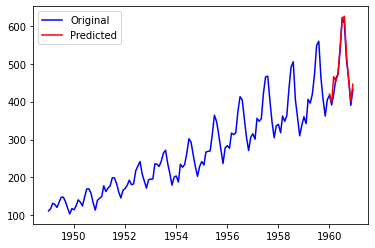

In [182]:
# Lets plot

plt.plot(airpas1, label = 'Original', color = 'blue')
plt.plot(pred_train, label = 'Predicted', color = 'red')
plt.legend()

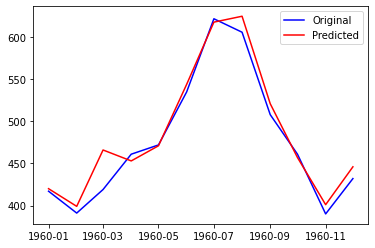

In [183]:
plt.plot(airpas1[132::], label = 'Original', color = 'blue')
plt.plot(pred_train, label = 'Predicted', color = 'red')
plt.legend()

In [184]:
pred_actual = pd.DataFrame()

In [185]:
pred_actual['Actual'] = airpas1[132::]
pred_actual['Predicted'] = pred_train

In [186]:
pred_actual

,Actual,Predicted
Month,,
1960-01-01,417,420.0
1960-02-01,391,399.0
1960-03-01,419,466.0
1960-04-01,461,453.0
1960-05-01,472,471.0
1960-06-01,535,544.0
1960-07-01,622,618.0
1960-08-01,606,625.0
1960-09-01,508,521.0


In [187]:
error = pred_actual.Actual - pred_actual.Predicted
error

Month
1960-01-01    -3.0
1960-02-01    -8.0
1960-03-01   -47.0
1960-04-01     8.0
1960-05-01     1.0
1960-06-01    -9.0
1960-07-01     4.0
1960-08-01   -19.0
1960-09-01   -13.0
1960-10-01     4.0
1960-11-01   -11.0
1960-12-01   -14.0
dtype: float64

In [188]:
MAPE = np.mean(np.absolute(error*100/pred_actual.Actual))
MAPE

2.5732081115140093

In [189]:
from sklearn.metrics import mean_absolute_percentage_error

In [190]:
mean_absolute_percentage_error(pred_actual.Actual, pred_actual.Predicted)*100

2.5732081115140097

# AD-Fuller Test

In [191]:
# In ad fuller test, the null hypothesis is that series is not stationary

In [192]:
from statsmodels.tsa.stattools import adfuller

In [193]:
adfuller(airpas1)

(0.8153688792060488,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [194]:
# In above p-vaue is 0.99 and so we fail to reject the null

In [195]:
adfuller(airpas1.diff().dropna())

(-2.8292668241700056,
 0.054213290283824704,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854085)

In [196]:
# Here after 1 differencing p-value is 0.054, which is near to 0.05
# So we can reject the null or assume that the model is stationary now

In [197]:
adfuller(airpas1.diff().diff().dropna())

(-16.384231542468548,
 2.732891850013967e-29,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.6020417275608)

In [198]:
# Here it is clearly showing that the model is stationary after 2 differencing 
# However,we should always check the visual picture

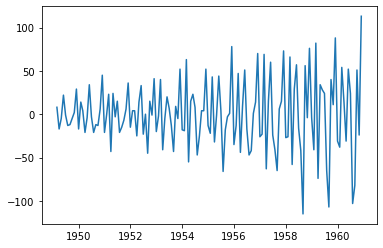

In [199]:
plt.plot(airpas1.diff().diff())

# KPSS

In [200]:
# One more test for stationality
# In KPSS null hypothesis is series is stationary

In [201]:
from statsmodels.tsa.stattools import kpss

In [202]:
kpss(airpas1)

C:\Users\RahulK\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(1.6513122354165206,
 0.01,
 8,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [203]:
kpss(airpas1.diff().dropna())

C:\Users\RahulK\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.023897614400183963,
 0.1,
 7,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})